In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import os
import datetime

In [3]:
def values_from_database():
    return pd.read_pickle("stocks_values_pivot")

In [4]:
def value_stock(stock_name, date_start, 
                end_date = datetime.datetime.today().strftime("%d-%m-%Y")):
    
    values = values_from_database()
    stock_values = pd.DataFrame(values[stock_name])
    stock_values.columns = ["HGDG_KAPANIS"]
    
    date_start = datetime.datetime.strptime(date_start, "%d-%m-%Y")

    values = stock_values.loc[(stock_values.index > date_start) &
                            (stock_values.index < end_date)]
    
    return values

In [5]:
# all_stock_value = pd.read_pickle("stocks_values_pivot")
def moving_average(all_stock_value, stock_name: str, number_of_days: int, start_date: str, end_date: str):
    
    date_start = datetime.datetime.strptime(start_date, "%d-%m-%Y") - datetime.timedelta(days=(number_of_days*1.5))
    end_date = datetime.datetime.strptime(end_date, "%d-%m-%Y")
    
    data = all_stock_value[[str(stock_name)]]
    
    data = data.loc[(data.index > date_start) & (data.index < end_date)]
    
    SMAs = []
    for i in range(data.shape[0]):
        sma = data[i:i+number_of_days].rolling(window=number_of_days).mean()
        sma = sma.iloc[-1,:]
        SMAs.append(sma)
    SMAs = pd.concat(SMAs, axis=1) 
    SMAs = SMAs.T
    SMAs = SMAs.dropna()
    
    return SMAs

In [6]:
all_stock_value = values_from_database()

In [7]:
moving_average(all_stock_value, "SAHOL", 20, "01-06-2019", "13-05-2020")

HGDG_HS_KODU,SAHOL
2019-05-30,7.2015
2019-05-31,7.2100
2019-06-03,7.2250
2019-06-07,7.2710
2019-06-10,7.3200
...,...
2020-05-06,7.7780
2020-05-07,7.7965
2020-05-08,7.8220
2020-05-11,7.8470


---

In [8]:
def all_movingAverages(all_stock_value, stock_name: str, number_of_days: list, start_date: str, end_date: str):
    
    MAs = [] 
    for days in number_of_days:
        MA = moving_average(all_stock_value, stock_name, days, start_date, end_date)
        MAs.append(MA)
    MAs = pd.concat(MAs, axis=1)
    
    titles = [("MA_" + str(i)) for i in number_of_days]
    MAs.columns = titles
    
    return MAs

In [9]:
all_movingAverages(all_stock_value, "SAHOL", [5,20], "01-06-2019", "13-05-2020")

,MA_5,MA_20
2019-05-30,NaN,7.2015
2019-05-31,7.360,7.2100
2019-06-03,7.492,7.2250
2019-06-07,7.692,7.2710
2019-06-10,7.874,7.3200
...,...,...
2020-05-06,8.048,7.7780
2020-05-07,8.024,7.7965
2020-05-08,7.990,7.8220
2020-05-11,8.010,7.8470


In [10]:
def all_movingAverages_plot(all_stock_value, stock_name: str, number_of_days: list, start_date: str, end_date: str):
    
    MAs = [] 
    for days in number_of_days:
        MA = moving_average(all_stock_value, stock_name, days, start_date, end_date)
        MAs.append(MA)
    MAs = pd.concat(MAs, axis=1)
    
    titles = [("MA_" + str(i)) for i in number_of_days]
    MAs.columns = titles
    
    titles = []
    for i in range(len(list(MAs))):
        titles.append(list(MAs)[i])
    
    return MAs[titles].plot.line(figsize=(20,5)) 

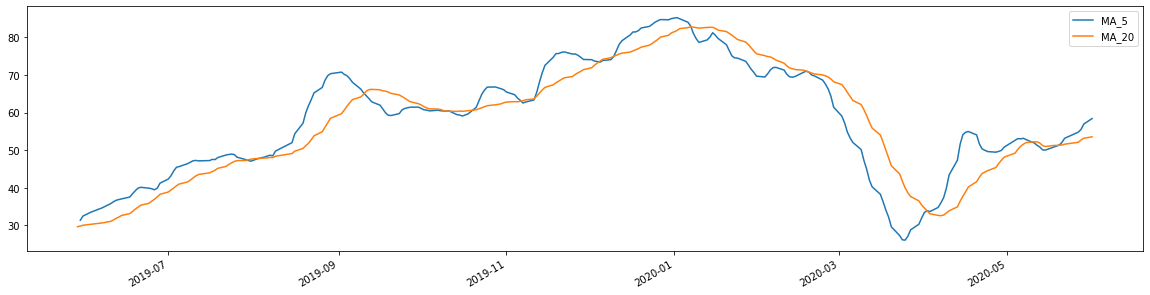

In [16]:
all_movingAverages_plot(all_stock_value, "PGSUS", [5,20], "31-05-2019", "02-06-2020")

---

In [12]:
data = sm.all_movingAverages(all_stock_value, "PENGD", [5,20], "01-06-2019", "03-06-2020")

In [13]:
data.tail(20)

,MA_5,MA_20
2020-04-29,3.482,3.5580
2020-04-30,3.424,3.5580
2020-05-04,3.344,3.5520
2020-05-05,3.268,3.5395
2020-05-06,3.238,3.5170
2020-05-07,3.202,3.5060
2020-05-08,3.166,3.4870
2020-05-11,3.170,3.4660
2020-05-12,3.186,3.4470
2020-05-13,3.174,3.4205


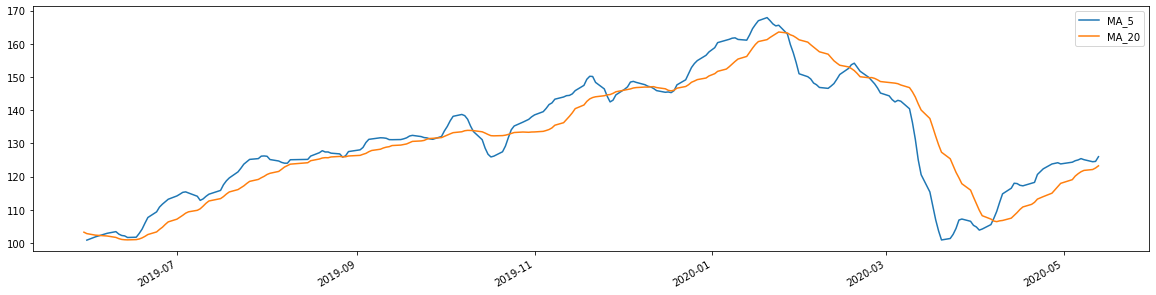

In [52]:
sm.all_movingAverages_plot(all_stock_value, "OTKAR", [5,20], "01-06-2019", "31-05-2020")

In [ ]:
### TO BE CONTINUED

In [53]:
data

,MA_5,MA_20
2019-05-30,NaN,103.255
2019-05-31,100.86,102.825
2019-06-03,101.86,102.355
2019-06-07,102.92,102.105
2019-06-10,103.42,101.680
...,...,...
2020-05-07,125.42,121.465
2020-05-08,125.10,121.865
2020-05-11,124.48,122.135
2020-05-12,124.58,122.595


In [54]:
data["comp"] = data["MA_5"] - data["MA_20"]

In [58]:
data.tail(30)

,MA_5,MA_20,comp
2020-03-31,105.32,113.838540,-8.518540
2020-04-01,104.82,111.859430,-7.039430
2020-04-02,103.88,109.864195,-5.984195
2020-04-03,104.20,108.226770,-4.026770
2020-04-06,105.54,107.202380,-1.662380
2020-04-07,107.42,106.615050,0.804950
2020-04-08,109.52,106.432525,3.087475
2020-04-09,112.26,106.671310,5.588690
2020-04-10,114.80,106.783255,8.016745
2020-04-13,116.50,107.483195,9.016805


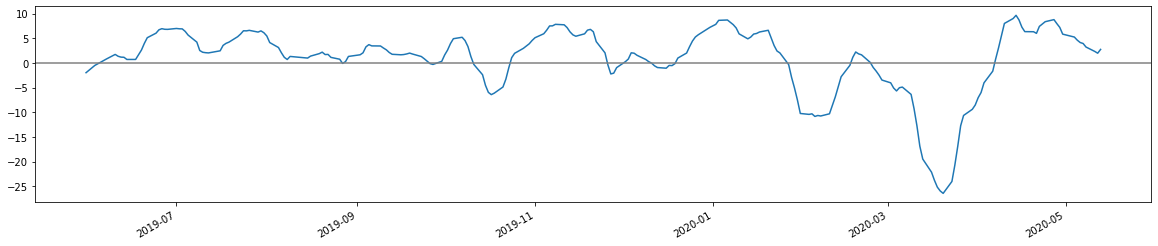

In [56]:
data.comp.plot(figsize=(20,4))
plt.axhline(0, color="gray")